# Federico Andrucci
### Matricola: 0001058695

##### federico.andrucci@studio.unibo.it


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

# Variables
file_name = 'exam_2021_01_27.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

# 1. Load the data from the file and show: the first fwe rows, the output of the **.describe()** function, the number of rows and columns (4pt)

In [2]:
# Loading the data from the csv file
df = pd.read_csv(file_name, sep=separator, header=None)

In [3]:
# Show the first few rows 
df.head()

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [4]:
# Show the output of the describe() function
df.describe()

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [5]:
# Show the number of rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset")

There are 150 rows and 5 columns in this dataset


# 2. Since the data contains nulls, eliminate the rows with nulls

In [6]:
# We will use Pandas's dropna() function to eliminate the rows with nulls
df = df.dropna()

# 3. Since one of the predictiong attributes is *ordinal*, it must be converted into *numeric*, you can use the **OrdinalEncoder**

The ordinal attribute is '2'

In [8]:
ordinal_attribute = '2'

# Instantiate the encoder with int32 as data type and perform fit_transform
encoder = OrdinalEncoder(dtype=np.int32)
transformed = encoder.fit_transform(df)

# Since fit_transform returns an ndarray, we will turn it back into a pandas Dataframe
df = pd.DataFrame(transformed)
df

,0,1,2,3,4
0,5,15,0,1,0
1,5,13,0,1,0
2,8,16,0,1,0
3,3,13,0,1,0
4,0,9,0,0,0
...,...,...,...,...,...
117,21,9,3,18,2
118,17,4,3,14,2
119,19,9,3,15,2
120,16,13,3,18,2


# 4. Split the data into *train* and *test*

I assume the column '4' is our target class

In [88]:
target = 4

Before splitting the data into trainig and test sets, we need to divide the feature matrix from the class

In [89]:
X = df.drop(target, axis=1)
y = df[target]

Now we can split the dataset

In [90]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state)

# 5. Use two classification models of your choice (say: model1 and model2) execute the tasks below

We will use Decision Trees (model 1) and K-Nearest Neighbors (model 2)

# 6. Model 1: find and show the best hyperparameter setting with *cross validation* on the training set, optimise for the best accuracy

In [91]:
# Instantiate the DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=random_state)

# Fit it to the training data
dt.fit(Xtrain, ytrain)

# Create the range of parameters to try during cross-validation
dt_depths = range(1, dt.get_depth() + 1)

# We will use GridSearchCV to perform cross-validation, we need to create the parameter
# list in a specific way for it to work
dt_params = [{'max_depth': list(dt_depths), 'random_state': [random_state]}]

# Instantiate GridSearchCV
dt_gs = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', return_train_score=False, n_jobs=2)

# Fit it to the training data
dt_gs.fit(Xtrain, ytrain)

# Print the best parameters found
print(f"The best parameter found for the DecisionTreeCalssifier was {dt_gs.best_params_}")

The best parameter found for the DecisionTreeCalssifier was {'max_depth': 3, 'random_state': 42}


# 7. Model 1: show the accuracy of classification and the confusion matrix on the test set. For the confusion matrix use *plot_confusion_matrix* normalized in order to show for each class the *precision*

In order to show the correct result, we will instantiate our DecisionTreeClassifier with the best parameters found and fit it to the data

In [92]:
dt = DecisionTreeClassifier(max_depth=3, random_state=random_state)
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=42)

The accuracy score for the DecisionTreeClassifier with the optimized hyperparameters was: 87.10%
The confusion matrix normalied to show precision is:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


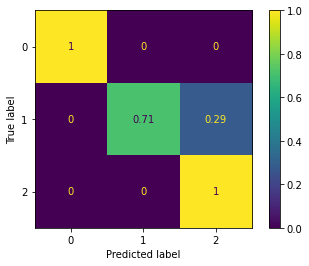

In [93]:
# Predict the test set in order to be able to compute the metrics later on
dt_ypred = dt.predict(Xtest)

# Accuracy score
dt_accuracy = accuracy_score(ytest, dt_ypred) * 100
print(f"The accuracy score for the DecisionTreeClassifier with the optimized hyperparameters was: {dt_accuracy:.2f}%")

# Confusion matrix normalized to show precision
print("The confusion matrix normalied to show precision is:")
plot_confusion_matrix(dt, Xtest, ytest, normalize='true')

# 8. Model 2: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy

In [95]:
# Instantiate the KNN Classifier
knn = KNeighborsClassifier()

# Create the range of parameters to try during cross-validation
knn_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# We will use GridSearchCV to perform cross-validation, we need to create the parameter
# list in a specific way for it to work
knn_params = [{'n_neighbors': knn_neighbors}]

# Instantiate GridSearchCV
knn_gs = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', return_train_score=False, n_jobs=2)

# Fit it to the training data
knn_gs.fit(Xtrain, ytrain)

# Print the best parameters found
print(f"The best parameters found for the KNN Classifier was {knn_gs.best_params_}")

The best parameters found for the KNN Classifier was {'n_neighbors': 9}


# 9. Model 2: show the accuracy of classification and the confusion matrix on the test set. For the confusion matrix use plot_confusion_matrix normalized in order to show for each class the precision

The accuracy score for the KNN classifier with the optimized hyperparameters was: 83.87%
The confusion matrix is:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


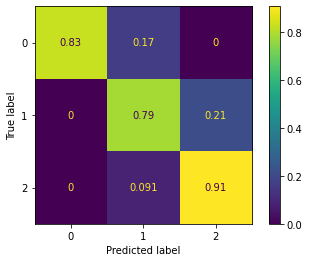

In [96]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(Xtrain, ytrain)

knn_ypred = knn.predict(Xtest)

knn_accuracy = accuracy_score(ytest, knn_ypred) * 100

print(f"The accuracy score for the KNN classifier with the optimized hyperparameters was: {knn_accuracy:.2f}%")

print("The confusion matrix is:")
plot_confusion_matrix(knn, Xtest, ytest, normalize='true')